<a href="https://colab.research.google.com/github/shand07/MLA2_SPH/blob/main/MLA2_SPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [109]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Imports for Splitting Data and Building Pipeline


In [110]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [112]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [113]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [114]:
steel_industry_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MLA2_SPH/Steel_industry_data.csv')

steel_industry_data = steel_industry_data.rename(columns={
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
})

print(steel_industry_data)

                   date  usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  \
0      01/01/2018 00:15       3.17                 2.95                  0.00   
1      01/01/2018 00:30       4.00                 4.46                  0.00   
2      01/01/2018 00:45       3.24                 3.28                  0.00   
3      01/01/2018 01:00       3.31                 3.56                  0.00   
4      01/01/2018 01:15       3.82                 4.50                  0.00   
...                 ...        ...                  ...                   ...   
35035  31/12/2018 23:00       3.85                 4.86                  0.00   
35036  31/12/2018 23:15       3.74                 3.74                  0.00   
35037  31/12/2018 23:30       3.78                 3.17                  0.07   
35038  31/12/2018 23:45       3.78                 3.06                  0.11   
35039  31/12/2018 00:00       3.67                 3.02                  0.07   

       CO2(tCO2)  lag_curre

### Statistical and Visual Exploration

In [115]:
steel_industry_data.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [116]:
load_type_counts = steel_industry_data['load_type'].value_counts().rename_axis('load_type').reset_index(name='counts')
df = pd.DataFrame(load_type_counts)
print(df)

      load_type  counts
0    Light_Load   18072
1   Medium_Load    9696
2  Maximum_Load    7272


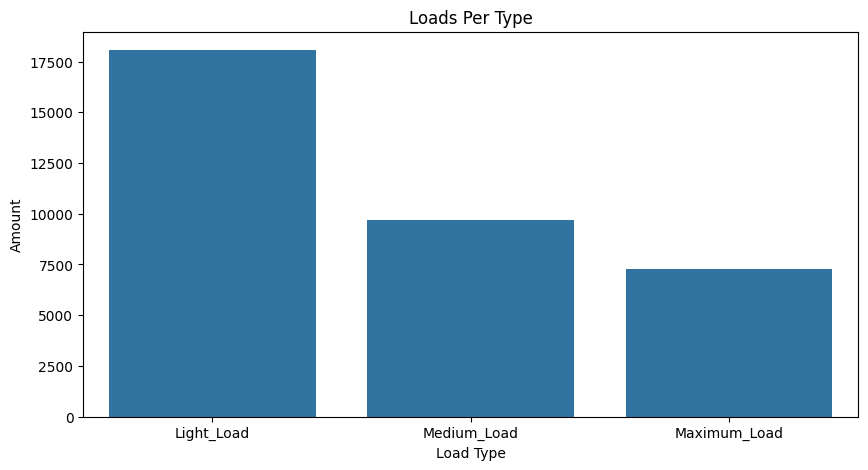

In [117]:
plt.figure(figsize=(10, 5))
sns.countplot(x='load_type', data=steel_industry_data)
plt.title('Loads Per Type')
plt.xlabel('Load Type')
plt.ylabel('Amount')
plt.show()

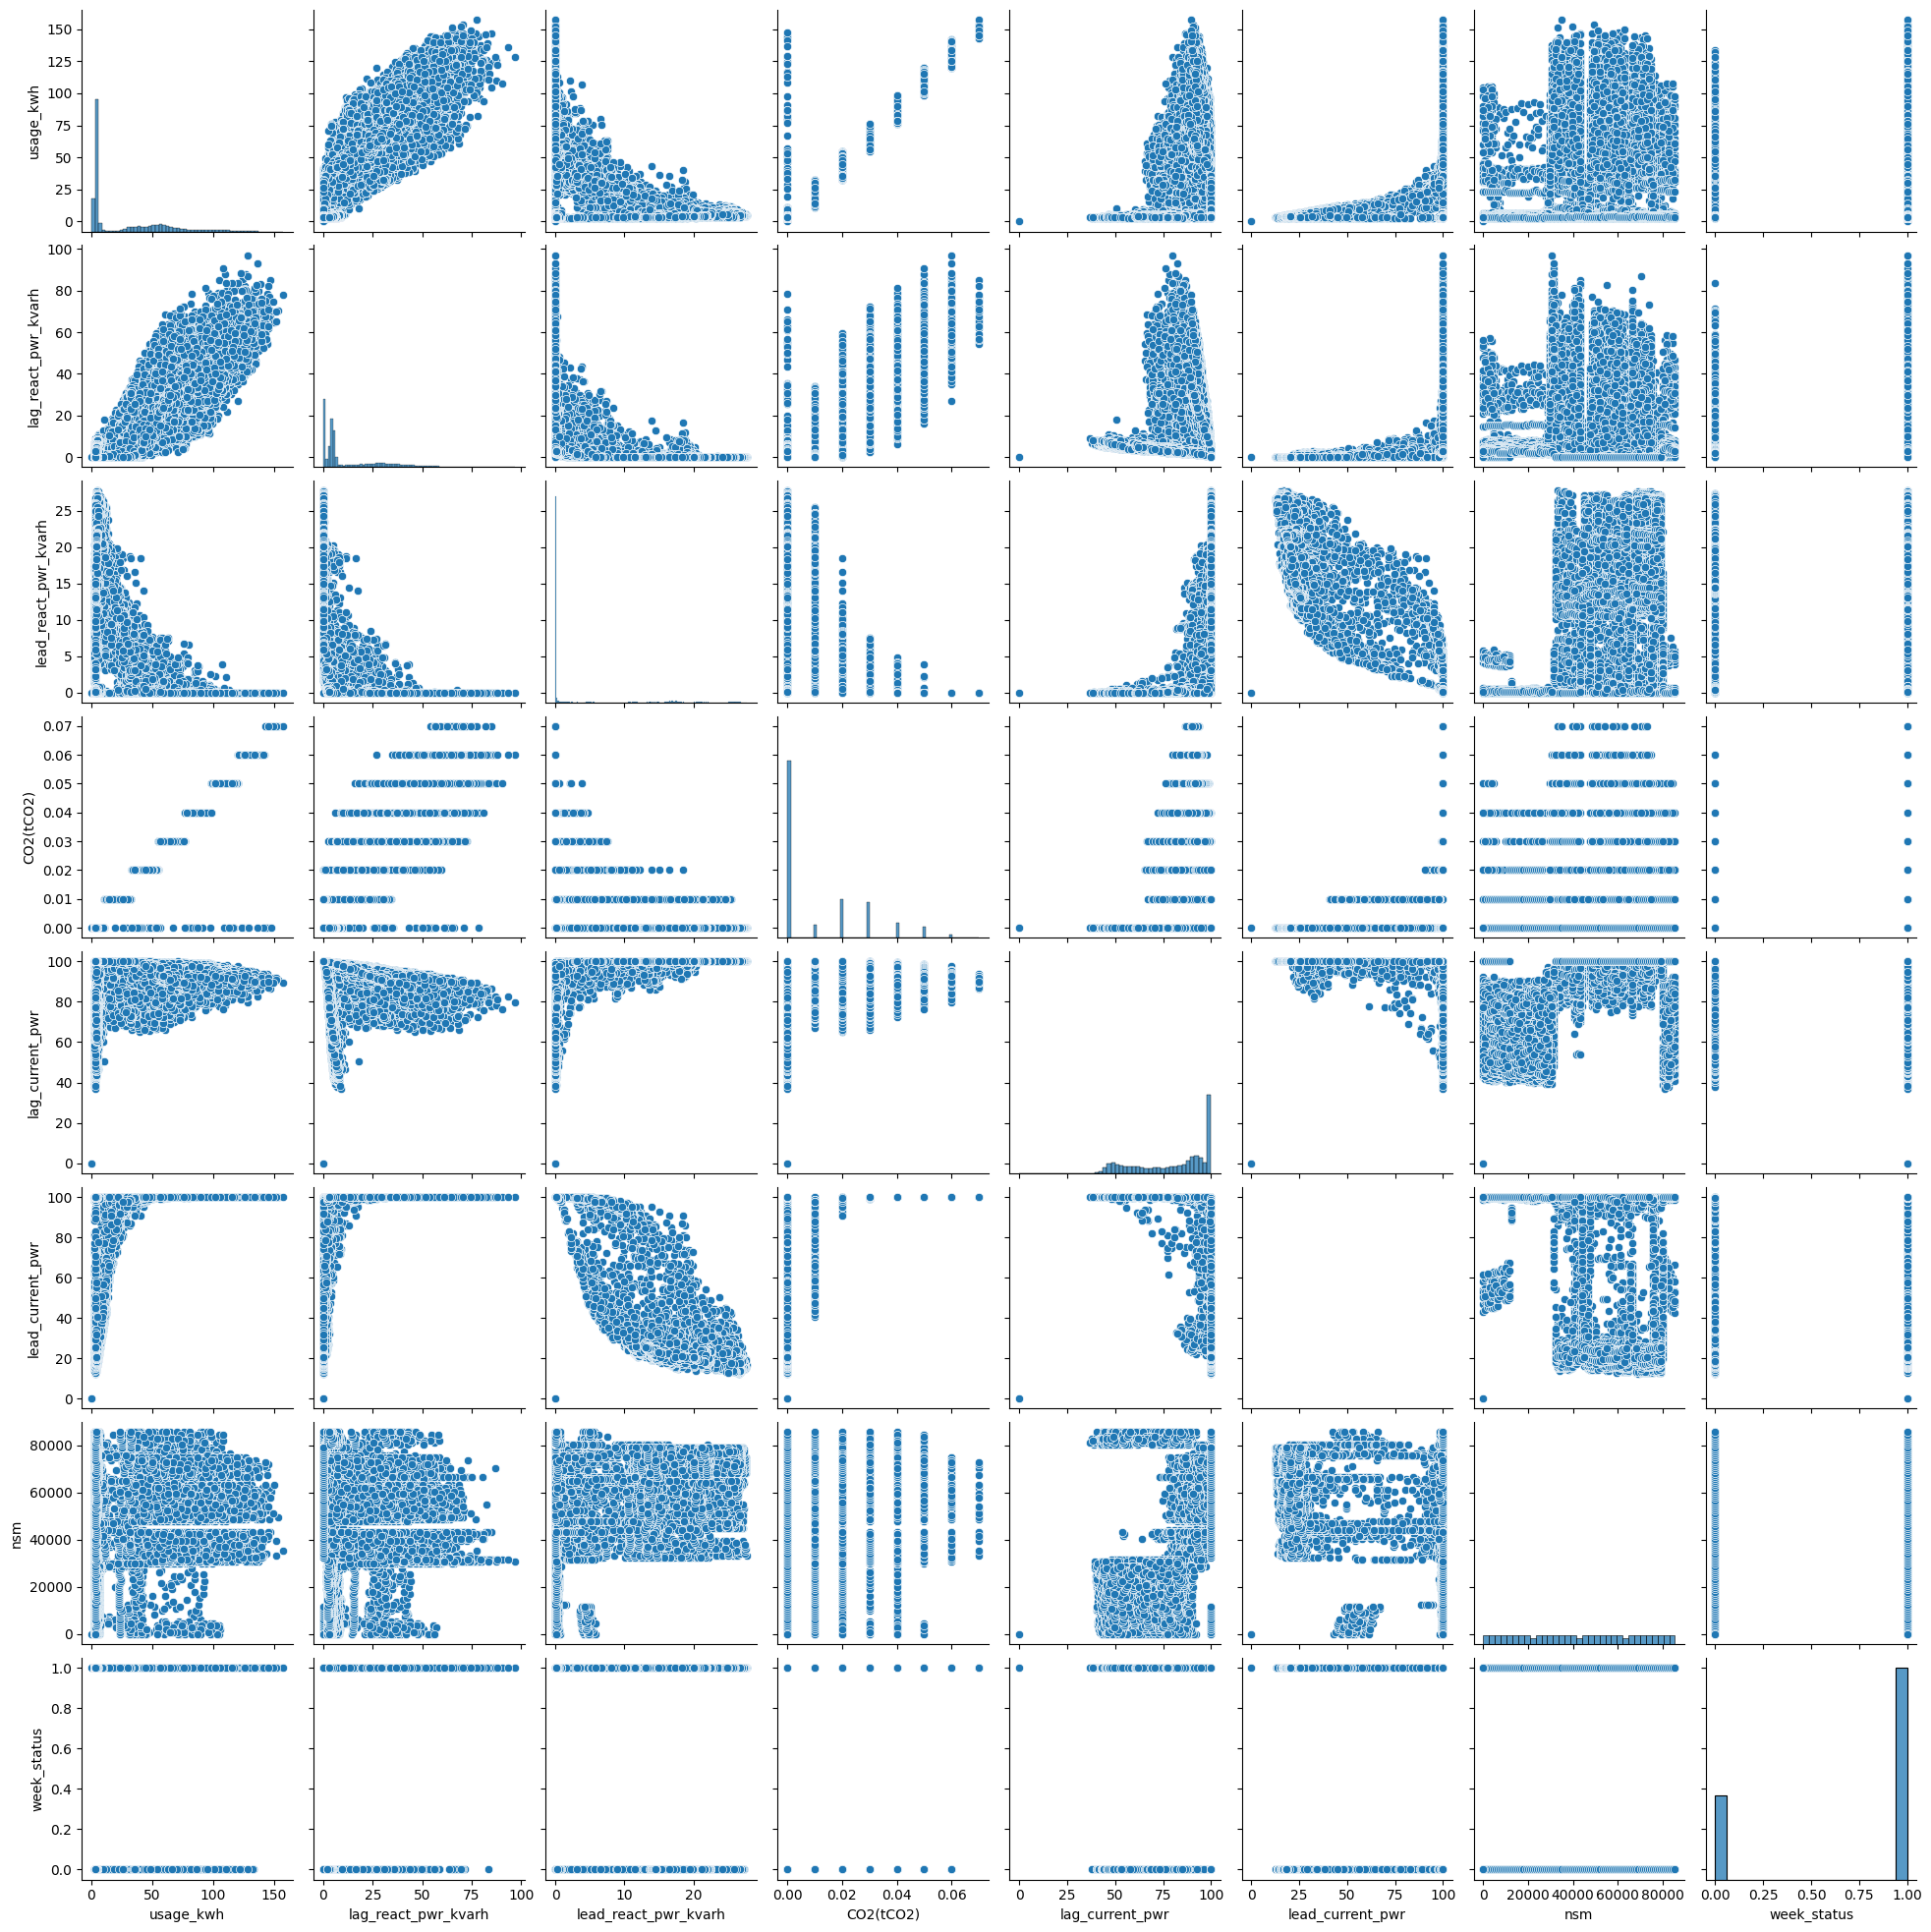

In [146]:
sns.pairplot(steel_industry_data.select_dtypes(include=np.number))
plt.show()

In [145]:
#All of them are interesting their own way atleast shape wise.
#That said, I find the ones that almost looking the the plot is the whole screen the most interesting.

### Splitting Data into Train/Test

In [119]:
X = steel_industry_data.drop(['date', 'usage_kwh'], axis=1)
y = steel_industry_data[['usage_kwh']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [120]:
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])

### Executing the Model

In [121]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('model', LinearRegression())])

### Evaluating Model

In [136]:
y_pred = pipeline.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 4.785832575403094
Test RMSE: 4.224012202014671


In [135]:
# The RMSE indicates the average difference between the predicted and actual values.
# Lower RMSE values generally suggest a better fit, so the model seems to
# perform well on both the train and test sets. However, the test RMSE
# is slightly higher than the train RMSE which means there is some overfitting.

In [134]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9843037490428131


In [133]:
# The R-squared value of 0.98 indicates a strong relationship between the
# variables, suggesting that the model explains a good amount of the
# difference in the target variable (usage_kwh).

In [132]:
print(f'Intercept: {pipeline.named_steps["model"].intercept_}')
print(f'Coefficients: {pipeline.named_steps["model"].coef_}')

Intercept: [-10.61918611]
Coefficients: [[ 3.17262028e+01  1.96727632e+00  1.15067949e+02  1.21859850e+01
   6.07039277e+00 -2.45728214e-01 -1.39006406e-02  1.39006406e-02
  -1.55506940e-01 -1.36341692e-01 -1.40020893e-01  1.53921534e-01
  -2.19683806e-01  5.72722964e-01 -7.50911673e-02 -1.04700642e+00
   2.77328377e-01  7.69678047e-01]]


### Conclusion
Write a general conclusion about the results of your model.

In [123]:
# The data suggests the linear regression model is a good choice for predicting kWh usage.
# The R-squared value of 0.98 shows a strong correlation between the features and the target variable,
# indicates that the model has a large portion of the variation.

# While the RMSE on both training and testing sets is relatively low,
# a slight difference between them might mean there is some overfitting.
# Still, the model seems to be performing well.

## Problem 2

### Reading the Data

In [124]:
steel_industry_data['week_status'] = steel_industry_data['week_status'].map({'Weekday': 1, 'Weekend': 0})

### Splitting Data into Train/Test

In [125]:
X_two = steel_industry_data.drop(['date', 'week_status', 'day_of_week'], axis=1)
y_two = steel_industry_data['week_status']

X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.2, random_state=42)

### Building the Pipeline

In [126]:
numerical_features_rebuild = X_two.select_dtypes(include=np.number).columns
categorical_features_rebuild = X_two.select_dtypes(include='object').columns

ct_two = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features_rebuild),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_rebuild)
    ], remainder='passthrough')

pipeline_rebuild = Pipeline([
    ('transformer', ct_two),
    ('model', LogisticRegression())
])

### Executing the Model

In [127]:
pipeline_rebuild.fit(X_train_two, y_train_two)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  Index(['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['load_type'], dtype='object'))])),
                ('model', LogisticRegression())])

### Evaluating Model

Precision: 0.7754087848669445
Recall: 0.9623955431754875
F1-score: 0.8588423295454546


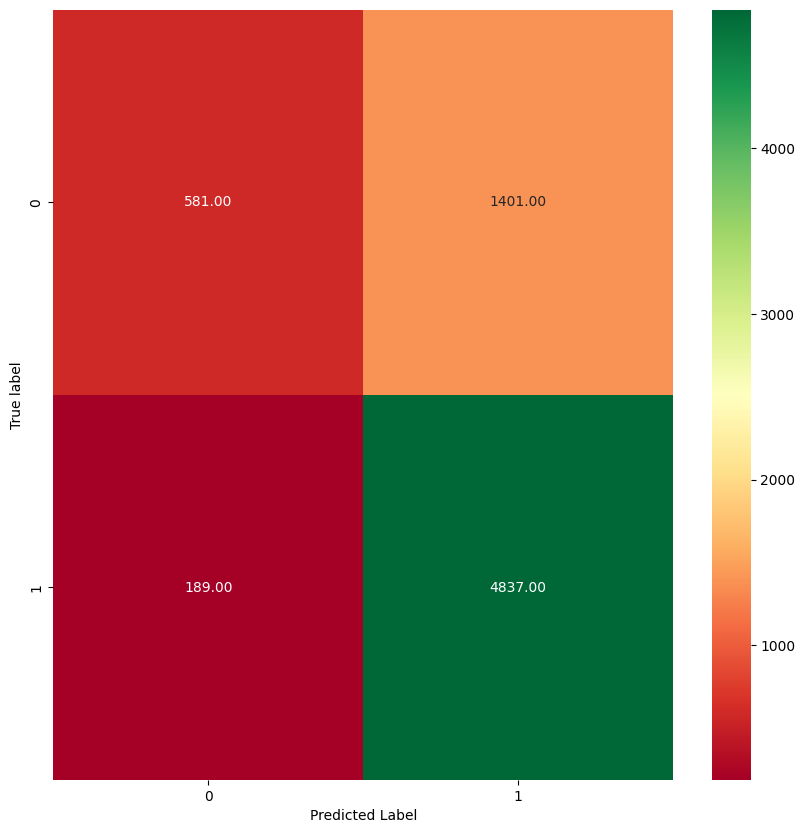

In [140]:
y_pred_two = pipeline_rebuild.predict(X_test_two)

plot_cm(y_test_two, y_pred_two)

precision = precision_score(y_test_two, y_pred_two)
recall = recall_score(y_test_two, y_pred_two)
f1 = f1_score(y_test_two, y_pred_two)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

In [141]:
# The precision, recall, and F1-score are all high, indicating that the model
# is doing a good job of classifying whether the week status is a weekday or
# weekend. The high precision suggests that when the model predicts a
# weekday or weekend, it is often correct. The high recall suggests that the
# model correctly identifies a large portion of the actual weekdays and
# weekends in the test data. The high F1-score signifies a good balance between
# precision and recall. This means the model is effective at classifying the
# week status with high accuracy.

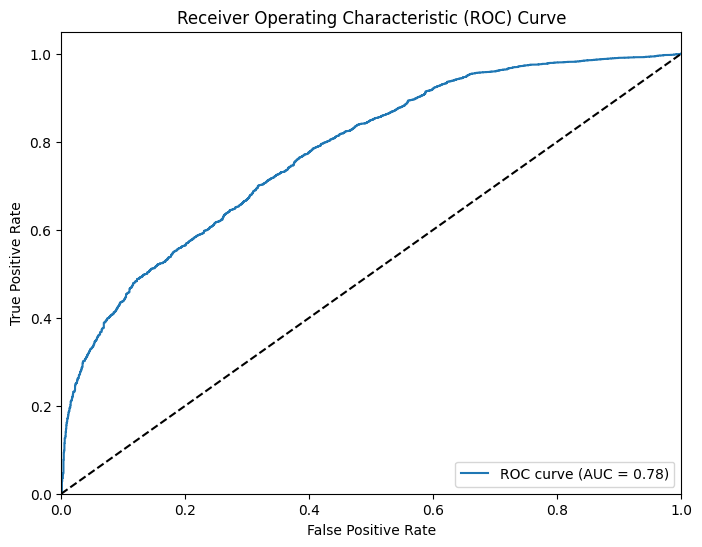

In [142]:
y_pred_proba = pipeline_rebuild.predict_proba(X_test_two)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_two, y_pred_proba)

roc_auc = roc_auc_score(y_test_two, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [147]:
# The ROC curve visualizes the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity)
# for different classification thresholds.
# The AUC measures the overall performance of the model, where a higher AUC indicates better discrimination between the two classes.
# In this case, the AUC is showing that the model is good at distinguishing between weekdays and weekends.

# The ROC curve is suitable in this scenario because we are interested in the model's ability to classify whether the week status
# is a weekday or a weekend correctly. It provides a comprehensive view of the model's performance across different thresholds
# and helps assess its effectiveness in distinguishing between the two classes, which is important for classification problems.

### Conclusion
Write a general conclusion about the results of your model.

In [148]:
# Based on the data,
# the logistic regression model isvery suitable for predicting which day it is.
# The high precision, recall, F1-score, and AUC suggest that the model is classifying.

# Therefore, this model can be considered a reliable tool for predicting week_status based on the provided steel industry data.

